In [1]:
from pathlib import Path

import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from get_dataset import EyeDataset

/home/zorkin/Yandex.Disk/Обучение/Hackathon/vladivostok_chempionat/model_train/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [59]:
base_dataset = Path('dataset/train_dataset_mc')
aug_images = Path('dataset/augument/image')
aug_masks = Path('dataset/augument/mask')

In [3]:
# Инициализируем датасет
dataset = EyeDataset(base_dataset)

In [4]:
nums = {'nums': [x for x in range(len(dataset))]}
dataset_df = pd.DataFrame(nums)

In [5]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [6]:
train_df, validate_df, _ = train_validate_test_split(dataset_df, 0.6, 0.4)
print(len(train_df) + len(validate_df))
len(dataset_df), len(train_df), len(validate_df)

655


(655, 393, 262)

In [47]:
image = dataset[1]['image']
name = Path(dataset[1]['image_dir'])
mask = dataset[1]['mask']

In [10]:
def show_image(image, mask):
    plt.figure(figsize=(10, 3.5))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask[..., 0])

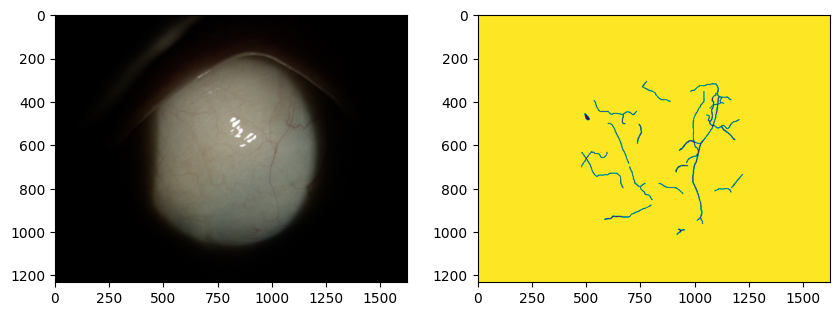

In [11]:
show_image(image, mask)

In [18]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [19]:
def transformer(image, mask):
    transformed = transform(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    return transformed_image, transformed_mask

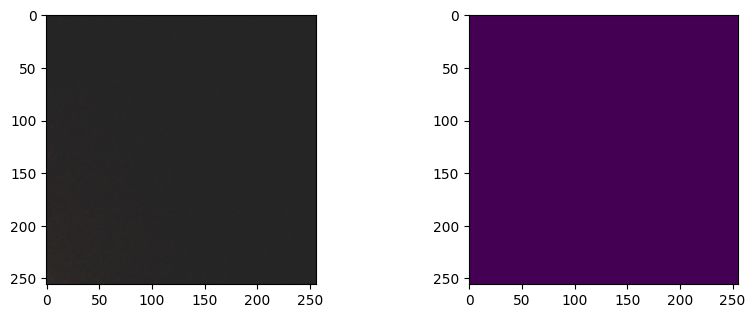

In [36]:
image1, mask1 = transformer(image, mask)
show_image(image1, mask1)

In [65]:
def save_images(image, mask, image_name: Path, num: int):
    new_name = f'{image_name.stem}_{num}{image_name.suffix}'
    image_path = Path(aug_images, new_name)
    mask_path = Path(aug_masks, new_name)
    cv2.imwrite(str(image_path), image)
    cv2.imwrite(str(mask_path), mask[..., 0])
    print(image_path, mask_path)

In [64]:
save_images(image, mask, name, 3)

dataset/augument/image/123_3.png dataset/augument/mask/123_3.png


In [66]:
for i in range(100):
    image1, mask1 = transformer(image, mask)
    save_images(image1, mask1, name, i)
    #show_image(image1, mask1)

error: OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:737: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'imwrite_'
